In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, words
from textblob import Word

In [3]:
# Correct absolute path
df = pd.read_csv("/Users/prarthana/Downloads/Reviews.csv")

# Preview the first 5 rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print("Shape of dataset (rows, columns):", df.shape)

Shape of dataset (rows, columns): (568454, 10)


In [5]:
print(df.dtypes)

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [6]:
# Convert 'ProductId' and 'UserId' to categorical data type
df['ProductId'] = df['ProductId'].astype('category')
df['UserId'] = df['UserId'].astype('category')

# Convert 'Time' from Unix timestamp to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [7]:
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [8]:
num_null_rows = df.isnull().any(axis=1).sum()
print("Number of rows with at least one null value:", num_null_rows)

Number of rows with at least one null value: 53


In [9]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [10]:
# Define the columns to check for duplicates
columns_to_check = ['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text']

# Count duplicates based on those columns
dup_count = df.duplicated(subset=columns_to_check).sum()

print(f"Number of duplicate rows based on {columns_to_check}: {dup_count}")

Number of duplicate rows based on ['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text']: 898


In [11]:
# Count rows where the 'Text' column is duplicated (entire 'Text' value is the same)
dup_text_count = df['Text'].duplicated(keep=False).sum()

print(f"Number of rows with duplicate 'Text' values: {dup_text_count}")

Number of rows with duplicate 'Text' values: 232915


In [12]:
# Sort by 'Text' so that rows with the same 'Text' are grouped together
dup_text_rows_sorted = df[df['Text'].duplicated(keep=False)].sort_values(by='Text')

# Get the first 10 rows where the 'Text' column is duplicated and sorted by 'Text'
dup_text_rows_head = dup_text_rows_sorted.head(10)

# Print the first 10 rows with duplicated 'Text'
dup_text_rows_head

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
257785,257786,B000KOWR8E,A142S4ZZF1FJ1X,Joseph E Brew,2,3,4,2010-10-09,Better Sweetener!,"""4C Totally Light"" is one of the very few ""sug..."
506745,506746,B000KOWR8Y,A142S4ZZF1FJ1X,Joseph E Brew,0,0,4,2010-10-09,4C Totally Light,"""4C Totally Light"" is one of the very few ""sug..."
107704,107705,B001F0RRTQ,A1R7E82MN0S8V3,DENNIS,0,0,5,2012-06-12,GREAT DOG TREAT,"""BUFFY"" LOOKS FORWARD TO HER ""TOY"" EVERY AFTER..."
418609,418610,B001F0RRU0,A1R7E82MN0S8V3,DENNIS,0,0,5,2012-06-12,GREAT DOG TREAT,"""BUFFY"" LOOKS FORWARD TO HER ""TOY"" EVERY AFTER..."
561246,561247,B001JU81ZG,A7FNPP1SMY97G,D. Hsu,4,6,1,2011-11-08,Buy this if you have NO taste buds!,"""Blends smooth and creamy for a sweet tasting ..."
330089,330090,B001OHX1ZY,A7FNPP1SMY97G,D. Hsu,4,6,1,2011-11-08,Buy this if you have NO taste buds!,"""Blends smooth and creamy for a sweet tasting ..."
233264,233265,B007TJGZ4A,A17950SQVNAVOD,Scott,2,2,1,2011-08-18,Packaging quality problem,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
473106,473107,B008FHUKE6,A17950SQVNAVOD,Scott,2,2,1,2011-08-18,Packaging quality problem,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
245224,245225,B0029XDZKI,A17950SQVNAVOD,Scott,2,2,1,2011-08-18,Packaging quality problem,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
425981,425982,B000TQEWM2,A17950SQVNAVOD,Scott,2,2,1,2011-08-18,Packaging quality problem,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."


In [13]:
# Group by text and filter to get groups where the size is greater than 1 (i.e., duplicates)
dup_text_groups = df.groupby('Text',observed=False).filter(lambda x: len(x) > 1)

# Sort the groups by 'textCat'
dup_text_groups_sorted = dup_text_groups.sort_values(by='Text')

# Print the duplicated rows, grouped by 'textCat'
dup_text_groups_sorted

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
257785,257786,B000KOWR8E,A142S4ZZF1FJ1X,Joseph E Brew,2,3,4,2010-10-09,Better Sweetener!,"""4C Totally Light"" is one of the very few ""sug..."
506745,506746,B000KOWR8Y,A142S4ZZF1FJ1X,Joseph E Brew,0,0,4,2010-10-09,4C Totally Light,"""4C Totally Light"" is one of the very few ""sug..."
107704,107705,B001F0RRTQ,A1R7E82MN0S8V3,DENNIS,0,0,5,2012-06-12,GREAT DOG TREAT,"""BUFFY"" LOOKS FORWARD TO HER ""TOY"" EVERY AFTER..."
418609,418610,B001F0RRU0,A1R7E82MN0S8V3,DENNIS,0,0,5,2012-06-12,GREAT DOG TREAT,"""BUFFY"" LOOKS FORWARD TO HER ""TOY"" EVERY AFTER..."
561246,561247,B001JU81ZG,A7FNPP1SMY97G,D. Hsu,4,6,1,2011-11-08,Buy this if you have NO taste buds!,"""Blends smooth and creamy for a sweet tasting ..."
...,...,...,...,...,...,...,...,...,...,...
48026,48027,B004SRH2B6,A13RF7W3A98FS0,utah2008,0,0,5,2011-10-01,great tasting,zico probably has the best taste of the coconu...
268751,268752,B004SRFYMK,A13RF7W3A98FS0,utah2008,0,0,5,2011-10-01,great tasting,zico probably has the best taste of the coconu...
292422,292423,B0022N49KU,A1R58LWNVV94NA,"Toni T. ""AboveAstar""",2,2,5,2011-12-20,"EXCELLENT Quality & Taste; Very, Very Versatil...","~ I ordered Farie's Finest Coconut powder, Map..."
167012,167013,B0022N49M8,A1R58LWNVV94NA,"Toni T. ""AboveAstar""",2,2,5,2011-12-20,"EXCELLENT Quality & Taste; Very, Very Versatil...","~ I ordered Farie's Finest Coconut powder, Map..."


In [14]:
# Now, filter within each group for rows where 'ProductId', 'UserId', 'ProfileName' are the same
dup_filtered = dup_text_groups.groupby(['Text','UserId','ProfileName','Summary'],observed=False).filter(lambda x: len(x) > 1)

# Sort the groups by 'textCat' and other relevant columns
dup_filtered_sorted = dup_filtered.sort_values(by=['Text','UserId','ProfileName','Summary'])

# Print the filtered and sorted duplicated rows
dup_filtered_sorted

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
107704,107705,B001F0RRTQ,A1R7E82MN0S8V3,DENNIS,0,0,5,2012-06-12,GREAT DOG TREAT,"""BUFFY"" LOOKS FORWARD TO HER ""TOY"" EVERY AFTER..."
418609,418610,B001F0RRU0,A1R7E82MN0S8V3,DENNIS,0,0,5,2012-06-12,GREAT DOG TREAT,"""BUFFY"" LOOKS FORWARD TO HER ""TOY"" EVERY AFTER..."
330089,330090,B001OHX1ZY,A7FNPP1SMY97G,D. Hsu,4,6,1,2011-11-08,Buy this if you have NO taste buds!,"""Blends smooth and creamy for a sweet tasting ..."
561246,561247,B001JU81ZG,A7FNPP1SMY97G,D. Hsu,4,6,1,2011-11-08,Buy this if you have NO taste buds!,"""Blends smooth and creamy for a sweet tasting ..."
184223,184224,B006ZC3IHY,A17950SQVNAVOD,Scott,0,0,1,2011-08-18,Packaging quality problem,"""Both"" of Gloria Jean's ""Hazelnut"" and ""Vanill..."
...,...,...,...,...,...,...,...,...,...,...
268751,268752,B004SRFYMK,A13RF7W3A98FS0,utah2008,0,0,5,2011-10-01,great tasting,zico probably has the best taste of the coconu...
358777,358778,B003CIBPN8,A13RF7W3A98FS0,utah2008,0,0,5,2011-10-01,great tasting,zico probably has the best taste of the coconu...
113740,113741,B0022N26NM,A1R58LWNVV94NA,"Toni T. ""AboveAstar""",2,2,5,2011-12-20,"EXCELLENT Quality & Taste; Very, Very Versatil...","~ I ordered Farie's Finest Coconut powder, Map..."
167012,167013,B0022N49M8,A1R58LWNVV94NA,"Toni T. ""AboveAstar""",2,2,5,2011-12-20,"EXCELLENT Quality & Taste; Very, Very Versatil...","~ I ordered Farie's Finest Coconut powder, Map..."


In [15]:
# Drop duplicates from the main DataFrame based on the specified columns
df_deduped = df.drop_duplicates(subset=['Text','UserId', 'ProfileName', 'Summary'])

# Assign it back to df if you want to overwrite the original
df = df_deduped

# Optional: check the shape after deduplication
print(f"Updated DataFrame shape: {df.shape}")

Updated DataFrame shape: (395016, 10)


In [16]:
df_sample = df.iloc[:10000].copy()

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df_sample['Summary'] = df_sample['Summary'].astype(str).apply(remove_stopwords)
df_sample['Text'] = df_sample['Text'].astype(str).apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prarthana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def remove_non_alpha(text):
    return ' '.join(re.findall(r'\b[a-zA-Z]+\b', text))

df_sample['Summary'] = df_sample['Summary'].apply(remove_non_alpha)
df_sample['Text'] = df_sample['Text'].apply(remove_non_alpha)

In [19]:
from nltk.corpus import words
nltk.download('words')

valid_words = set(words.words())

def remove_nonsense_words(text):
    return ' '.join([word for word in text.split() if word.lower() in valid_words and len(word) > 2])

df_sample['Summary'] = df_sample['Summary'].apply(remove_nonsense_words)
df_sample['Text'] = df_sample['Text'].apply(remove_nonsense_words)

[nltk_data] Downloading package words to /Users/prarthana/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [20]:
import nltk
from symspellpy import SymSpell, Verbosity
from nltk.corpus import words
# Step 1: Download NLTK words corpus
nltk.download('words')

# Step 2: Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Step 3: Load NLTK words into SymSpell dictionary
word_list = words.words()  # List of words from NLTK corpus

# Add words to SymSpell dictionary
for word in word_list:
    sym_spell.create_dictionary_entry(word, 1)  # Frequency is set to 1 for each word

# Step 4: Define a function to correct spelling using SymSpell
def correct_spelling_symspell(text):
    corrected_words = []
    for word in text.split():
        # Check if the word exists in the dictionary and correct it
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected_words.append(suggestions[0].term)  # Take the closest match
        else:
            corrected_words.append(word)  # Keep original if no correction found
    return ' '.join(corrected_words)

# Step 5: Apply spell correction to the 'Summary' and 'Text' columns
df_sample['Summary'] = df_sample['Summary'].apply(correct_spelling_symspell)
df_sample['Text'] = df_sample['Text'].apply(correct_spelling_symspell)

# Display the cleaned data
df_sample


[nltk_data] Downloading package words to /Users/prarthana/nltk_data...
[nltk_data]   Package words is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,food quality dog food,bought several vitality canned dog food found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,,product bumbo salted the actually small sized ...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,belight,confection around light pillowy citrus gelatin...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,cough medicine,looking secret ingredient believe found got ad...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,great taffy,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...
10492,10493,B000LRH7HG,AN3OP2G22N4J9,Tanya Williams,6,6,5,2008-03-11,delivery good too,delivery thought would concerned food item wou...
10493,10494,B000LRH7HG,A2WK33PT44TRA5,"Keith Porter ""cannon""",3,3,5,2009-04-12,gyro,love good gyro order meat time never let down ...
10494,10495,B000LRH7HG,A1PUKZOSTX28WP,R. M. Singer,2,2,5,2008-06-04,GYRO LOVER,product gyro heat LOAF finally enjoy home with...
10495,10496,B000LRH7HG,A17Y465UXZOJE3,Stickman,1,1,4,2012-05-21,meat good break shipping,bought gyro meat several times good since almo...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine Summary and Text columns into one corpus
corpus = df_sample['Summary'].fillna('') + " " + df_sample['Text'].fillna('')

# Initialize and apply TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert to DataFrame for easy inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Identify top N words based on TF-IDF score
top_n = tfidf_df.sum(axis=0).sort_values(ascending=False)
print(top_n)

great          357.344901
coffee         341.098963
good           296.540106
like           293.160072
product        265.753897
                  ...    
flabby           0.026635
diaphragm        0.026635
fore             0.026635
musculature      0.026635
overdry          0.026635
Length: 10038, dtype: float64


In [27]:
# Calculate mean and median TF-IDF scores
mean_tfidf = top_n.mean()
median_tfidf = top_n.median()

# Words above the mean or median
significant_words_mean = top_n[top_n > mean_tfidf]
insignificant_words_mean = top_n[top_n <= mean_tfidf]

print("Significant words (above the mean):")
print(significant_words_mean)

print("Insignificant words (below the mean):")
print(insignificant_words_mean)

Significant words (above the mean):
great       357.344901
coffee      341.098963
good        296.540106
like        293.160072
product     265.753897
               ...    
harsh         4.551142
fragrant      4.546275
carton        4.541447
fizzy         4.539404
club          4.538934
Length: 1749, dtype: float64
Insignificant words (below the mean):
who            4.535317
handful        4.533086
habit          4.527853
shiny          4.522456
yesterday      4.521597
                 ...   
flabby         0.026635
diaphragm      0.026635
fore           0.026635
musculature    0.026635
overdry        0.026635
Length: 8289, dtype: float64


In [31]:
# Function to filter words in a sentence based on significant words
def filter_significant_words(text, significant_words_mean):
    # Tokenize the text into words (lowercase to match exactly)
    words = text.split()
    # Keep only words that are in significant_words_mean
    filtered_words = [word for word in words if word.lower() in significant_words_mean.index]
    # Join back the filtered words into a sentence
    return ' '.join(filtered_words)

# Apply the filtering function to both columns of df_sample
df_sample['Text'] = df_sample['Text'].apply(lambda x: filter_significant_words(x, significant_words_mean))
df_sample['Summary'] = df_sample['Summary'].apply(lambda x: filter_significant_words(x, significant_words_mean))

# Print the updated DataFrame with filtered text and summary
df_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,food quality dog food,bought several canned dog food found good qual...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,,product salted the actually small sized sure v...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,,around light citrus case cut tiny powdered sug...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,cough,looking ingredient believe found got addition ...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,great taffy,great taffy great price assortment yummy taffy...
...,...,...,...,...,...,...,...,...,...,...
10492,10493,B000LRH7HG,AN3OP2G22N4J9,Tanya Williams,6,6,5,2008-03-11,delivery good too,delivery thought would concerned food item wou...
10493,10494,B000LRH7HG,A2WK33PT44TRA5,"Keith Porter ""cannon""",3,3,5,2009-04-12,,love good order meat time never let down good ...
10494,10495,B000LRH7HG,A1PUKZOSTX28WP,R. M. Singer,2,2,5,2008-06-04,LOVER,product heat LOAF finally enjoy home without g...
10495,10496,B000LRH7HG,A17Y465UXZOJE3,Stickman,1,1,4,2012-05-21,meat good break shipping,bought meat several times good since almost go...


In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment score
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Returns a score between -1 and 1

# Apply VADER sentiment analysis
df_sample['Text_vader_sentiment'] = df_sample['Text'].apply(get_vader_sentiment)
df_sample['Summary_vader_sentiment'] = df_sample['Summary'].apply(get_vader_sentiment)

# You can classify the sentiment into categories (optional)
df_sample['Text_vader_sentiment_class'] = df_sample['Text_vader_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
df_sample['Summary_vader_sentiment_class'] = df_sample['Summary_vader_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Print the updated DataFrame with VADER sentiment results
print(df_sample[['Text', 'Text_vader_sentiment', 'Text_vader_sentiment_class', 'Summary', 'Summary_vader_sentiment', 'Summary_vader_sentiment_class']])


                                                    Text  \
0      bought several canned dog food found good qual...   
1      product salted the actually small sized sure v...   
2      around light citrus case cut tiny powdered sug...   
3      looking ingredient believe found got addition ...   
4      great taffy great price assortment yummy taffy...   
...                                                  ...   
10492  delivery thought would concerned food item wou...   
10493  love good order meat time never let down good ...   
10494  product heat LOAF finally enjoy home without g...   
10495  bought meat several times good since almost go...   
10496  sliced meat single cardboard box vacuum seal e...   

       Text_vader_sentiment Text_vader_sentiment_class  \
0                    0.8807                   Positive   
1                    0.3182                   Positive   
2                    0.9237                   Positive   
3                    0.4404                   P

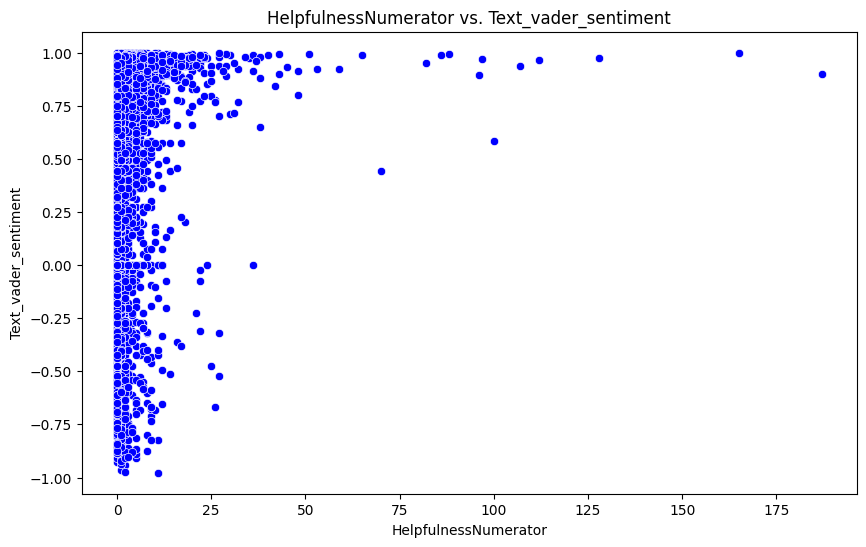

In [43]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='HelpfulnessNumerator', y='Text_vader_sentiment', color='blue')
plt.title('HelpfulnessNumerator vs. Text_vader_sentiment')
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('Text_vader_sentiment')
plt.show()


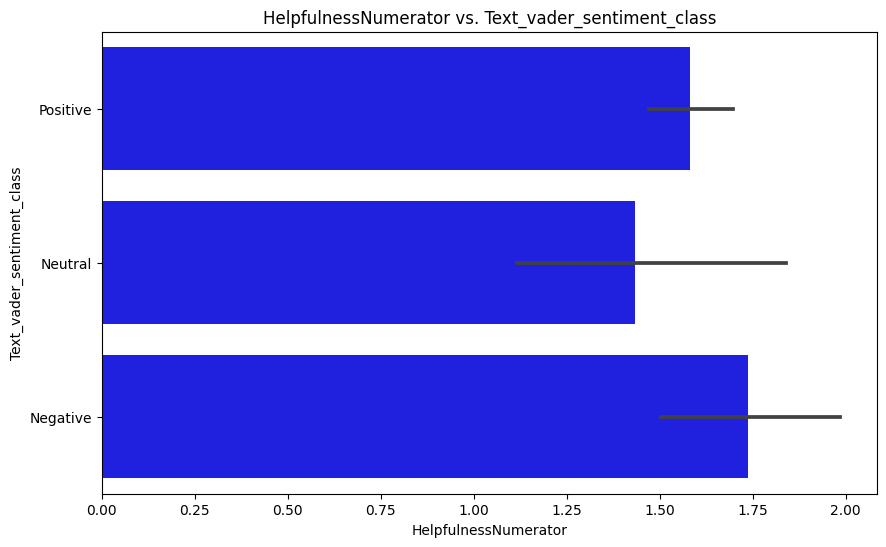

In [54]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sample, x='HelpfulnessNumerator', y='Text_vader_sentiment_class', color='blue')
plt.title('HelpfulnessNumerator vs. Text_vader_sentiment_class')
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('Text_vader_sentiment_class')
plt.show()


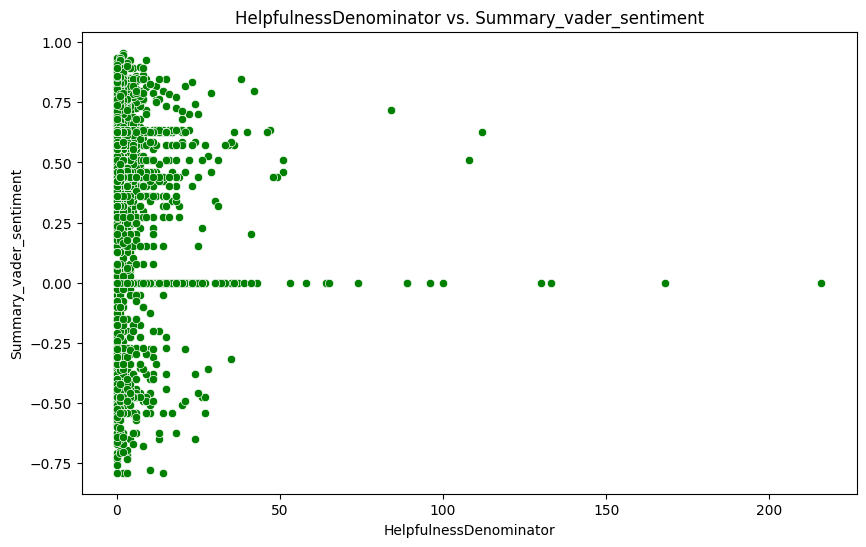

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='HelpfulnessDenominator', y='Summary_vader_sentiment', color='green')
plt.title('HelpfulnessDenominator vs. Summary_vader_sentiment')
plt.xlabel('HelpfulnessDenominator')
plt.ylabel('Summary_vader_sentiment')
plt.show()

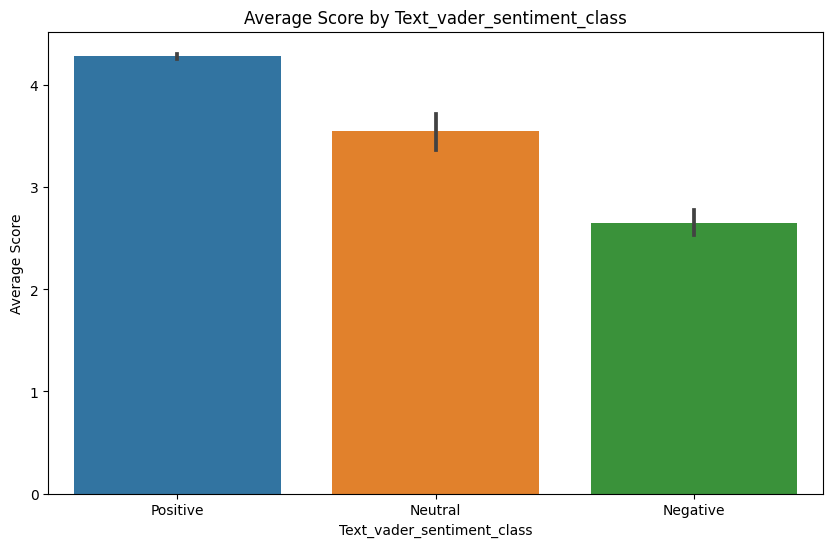

In [48]:
#Bar Plot: Average Score by Text_vader_sentiment_class
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sample, x='Text_vader_sentiment_class', y='Score', estimator='mean')
plt.title('Average Score by Text_vader_sentiment_class')
plt.xlabel('Text_vader_sentiment_class')
plt.ylabel('Average Score')
plt.show()

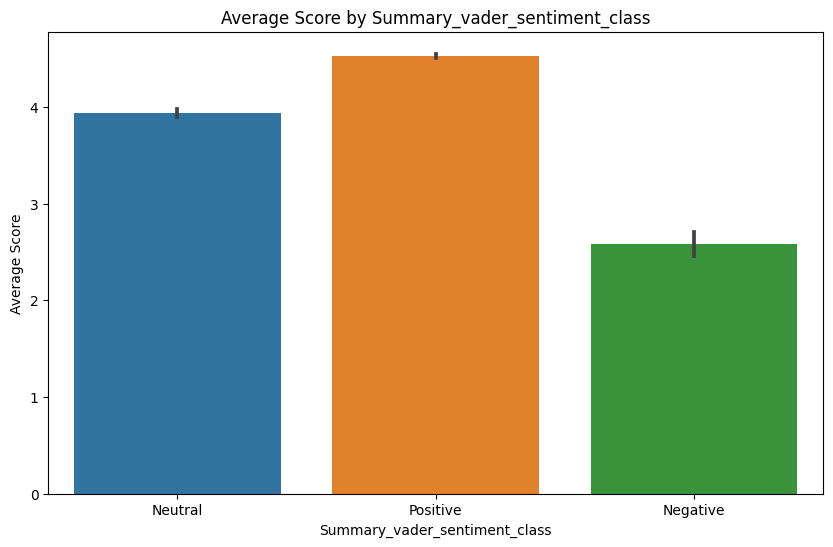

In [50]:
#Bar Plot: Average Score by Summary_vader_sentiment_class
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sample, x='Summary_vader_sentiment_class', y='Score', estimator='mean')
plt.title('Average Score by Summary_vader_sentiment_class')
plt.xlabel('Summary_vader_sentiment_class')
plt.ylabel('Average Score')
plt.show()